# Imports

In [1]:
import numpy as np
from qiskit_aer import Aer
from qiskit import QuantumCircuit
from IPython.display import display
from qiskit.quantum_info import Operator

# Functions

In [2]:
def generateCircuit(n, draw=True):
    circuit = QuantumCircuit(2*n)
    for m in range(n):
        circuit.h(m)
    circuit.barrier()
    for m in range(n):
        circuit.cx(m, n+m)
    for m in range(n):
        circuit.cx(0, n+m)
        # break   # Uncomment for "simple" oracle.
    circuit.barrier()
    for m in range(n):
        circuit.h(m)
    if draw:
        circuit.draw('mpl')
    return circuit

def operatorFromCircuit(circuit, draw=True):
    unitary = Operator.from_circuit(circuit)
    if draw:
        display(unitary.draw('latex', max_size=1000))
    return unitary.to_matrix()

def solveQubo(q, n):
    mins = set()
    minExpectation = np.inf
    for i in range(2**(2**(2*n))):
        x = f'{i:0{2**(2*n)}b}'
        v = np.array(list(map(int, list(x))))
        expectation = v.T @ q @ v
        if expectation < minExpectation:
            minExpectation = expectation
            mins = set()
            mins.add(x)
        if expectation == minExpectation:
            mins.add(x)
    return mins, minExpectation

def interpretResults(results, n):
    candidates = set()
    decodedResults = set()
    for result in results:
        indices = list(find_all(result, '1'))
        for index in indices:
            if index not in candidates:
                print(f'{index:0{2*n}b}')
                candidates.add(index)
            decodedResults.add(f'{index:0{2*n}b}'[n:])
    return decodedResults

def find_all(a_str, sub):
    start = 0
    while True:
        start = a_str.find(sub, start)
        if start == -1: return
        yield start
        start += len(sub)

# Constants

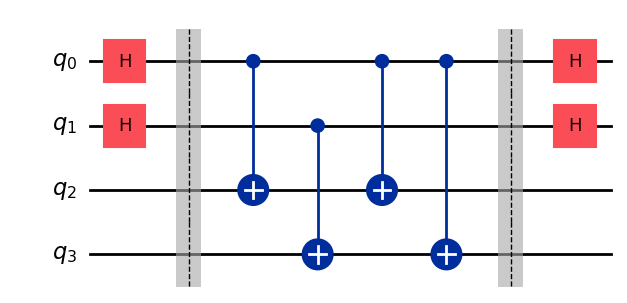

In [3]:
n = 2
circ = generateCircuit(n)
circ.draw('mpl')

In [4]:
q = operatorFromCircuit(circ, True)

<IPython.core.display.Latex object>

# Solve QUBO

In [5]:
results, minExpectation = solveQubo(q, n)
sortedResults = sorted(results, key=lambda x: int(x, 2))
for x in sortedResults:
    print(x)

0000000000000000
0000000100001000
0000001000000100
0000001100001100
0000010000000010
0000010100001010
0000100000000001
0000101000000101
0000110000000011
0001000010000000
0001000110001000
0001001010000100
0001001110001100
0001010010000010
0001010110001010
0001100010000001
0001101010000101
0001110010000011
0010000001000000
0010000101001000
0010001001000100
0010001101001100
0010010001000010
0010010101001010
0010100001000001
0010101001000101
0010110001000011
0011000011000000
0011000111001000
0011001011000100
0011001111001100
0011010011000010
0011010111001010
0011100011000001
0011101011000101
0011110011000011
0100000000100000
0100000100101000
0100001000100100
0100001100101100
0100010000100010
0100010100101010
0100100000100001
0100101000100101
0100110000100011
0101000010100000
0101000110101000
0101001010100100
0101001110101100
0101010010100010
0101010110101010
0101100010100001
0101101010100101
0101110010100011
1000000000010000
1000000100011000
1000001000010100
1000001100011100
10000100000100

# Expected Solution

In [6]:
x = np.array([
    1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
])
print(x@q)
# 0, 3, 8, 11
# 0000 = 0
# 0011 = 3
# 1000 = 8
# 1011 = 11

[ 0.5+0.j  0. +0.j  0. +0.j  0.5+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j
  0.5+0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]


# Experiments

In [7]:
e, U = np.linalg.eig(q)
print(e)

[ 1.-9.24446373e-33j -1.+3.08148791e-33j  1.+0.00000000e+00j
 -1.+0.00000000e+00j  1.+0.00000000e+00j  1.+6.16297582e-33j
 -1.-3.08148791e-33j  1.+0.00000000e+00j -1.+0.00000000e+00j
  1.+0.00000000e+00j  1.-2.77555756e-16j  1.+1.66533454e-16j
  1.+0.00000000e+00j  1.+0.00000000e+00j  1.+0.00000000e+00j
  1.+0.00000000e+00j]


In [8]:
d = np.real(np.diag(np.round(e, 2)))
print(d)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. 

In [9]:
results, minExpectation = solveQubo(d, n)
print(minExpectation)
print(results)
interpretResults(results, n)

-4.0
{'0101001010000000'}
0001
0011
0110
1000


{'00', '01', '10', '11'}

In [10]:
eExpected = np.diag([-1,1,1,-1,1,1,1,1,-1,1,1,-1,1,1,1,1])
results, minExpectation = solveQubo(eExpected, n)
print(minExpectation)
print(results)
interpretResults(results, n)

-4
{'1001000010010000'}
0000
0011
1000
1011


{'00', '11'}

# Experiments

In [11]:
evals = e[np.real(e) < 0]
evecs = U[np.real(e) < 0]
decomp = np.linalg.qr(evecs)
print(np.real(np.round(decomp[0])))

[[ 0.  1. -0. -0.]
 [-1. -0. -1.  0.]
 [-0.  0.  0.  1.]
 [-1.  0.  1. -0.]]


In [12]:
evecs2 = np.array([
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
])
decomp2 = np.linalg.qr(evecs2)
print(decomp2[0])

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
